In [1]:
#adding general library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

/home/erdenzehra/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#uploading data
df = pd.read_excel('21-22.xlsx') #2021-2022 STAAR 8th Grade Math Fall and Spring Interim Assessment Data
df1 = pd.read_excel('22-23.xlsx') #2022-2023 STAAR 8th Grade Math Fall and Spring Interim Assessment Data

In [3]:
df.columns

Index(['Assessment', 'Course ', 'TeacherName', 'Section', 'Student_ID',
       'Percent Score', 'Scale Score', 'Mastery Projection',
       'Approach Probability', 'Meet Probability', 'Master Probability',
       'Projected Tier'],
      dtype='object')

In [4]:
#selecting the student data of specific teachers

kept_teachers_21 = ["Erden, Ilknur", "Arslan, Neslihan Feyza", "Leadon, Alcindor", "Zeneli, Besmira", "Ramirez, Romeo"]
kept_teachers_22 = ["Ramirez, Romeo"]

a = df["TeacherName"].isin(kept_teachers_21)
b = df1["TeacherName"].isin(kept_teachers_22)
df = df[a]
df1 = df1[b]

In [5]:
df #2021-2022

,Assessment,Course,TeacherName,Section,Student_ID,Percent Score,Scale Score,Mastery Projection,Approach Probability,Meet Probability,Master Probability,Projected Tier
4,Interim Spring,Math-8,"Arslan, Neslihan Feyza",8D-A4,8055685,0.2941,1510,Did Not Meet,0.04,0.01,0.01,Tier 3 (RTI)
5,Interim Spring,Math-8,"Arslan, Neslihan Feyza",8C-A3,8055659,0.4118,1710,Meet,0.99,0.68,0.01,Tier 1
8,Interim Spring,Math-8,"Erden, Ilknur",8C,8055370,0.3235,1600,Approach,0.57,0.02,0.01,Tier 2
11,Interim Spring,Math-8,"Leadon, Alcindor",8-B,8055144,0.2941,1583,Did Not Meet,0.42,0.01,0.01,Tier 3
12,Interim Spring,Math-8,"Erden, Ilknur",8C,8055100,0.5882,1799,Meet,0.99,0.99,0.21,Tier 1
...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Interim Spring,Math-8,"Leadon, Alcindor",8-D,1110727,0.3235,1528,Did Not Meet,0.08,0.01,0.01,Tier 3 (RTI)
1295,Interim Fall,Math-8,"Zeneli, Besmira",02,1109369,0.3824,1625,Approach,0.84,0.19,0.01,Tier 1
1296,Interim Spring,Math-8,"Zeneli, Besmira",2,1109369,0.3529,1616,Approach,0.71,0.04,0.01,Tier 2
1297,Interim Fall,Algebra I,"Ramirez, Romeo",8A,1109222,0.4722,3930,Approach,0.99,0.32,0.01,Tier 1


In [6]:
df1 #2022-2023

,Assessment,Course,TeacherName,Section,Student_ID,Percent Score,Scale Score,Mastery Projection,Approach Probability,Meet Probability,Master Probability,Projected Tier
949,Interim Fall,Math-8,"Ramirez, Romeo",8-B,4610555,0.5312,1557,Did Not Meet,0.39,0.01,0.01,Tier 3
950,Interim Spring,Math-8,"Ramirez, Romeo",8-B,4610555,0.3421,1576,Did Not Meet,0.37,0.01,0.01,Tier 3
951,Interim Fall,Math-8,"Ramirez, Romeo",8-B,8066534,0.4062,1560,Did Not Meet,0.42,0.02,0.01,Tier 3
952,Interim Spring,Math-8,"Ramirez, Romeo",8-B,8066534,0.4474,1573,Did Not Meet,0.34,0.01,0.01,Tier 3
953,Interim Fall,Math-8,"Ramirez, Romeo",8-B,8052513,0.3750,1492,Did Not Meet,0.06,0.01,0.01,Tier 3 (RTI)
...,...,...,...,...,...,...,...,...,...,...,...,...
1074,Interim Fall,Math-8,"Ramirez, Romeo",8-D,8032753,0.2500,1431,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI)
1075,Interim Spring,Math-8,"Ramirez, Romeo",8-D,8032753,0.2368,1514,Did Not Meet,0.05,0.01,0.01,Tier 3 (RTI)
1076,Interim Fall,Math-8,"Ramirez, Romeo",8-D,8048853,0.2812,1448,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI)
1077,Interim Spring,Math-8,"Ramirez, Romeo",8-D,8048853,0.4474,1628,Approach,0.84,0.07,0.01,Tier 1


# Data Preprocessing

In [7]:
#separating the datasets into fall and spring 

fall_df = df[df['Assessment'] == 'Interim Fall']
spring_df = df[df['Assessment'] == 'Interim Spring']

fall_df1 = df1[df1['Assessment'] == 'Interim Fall']
spring_df1 = df1[df1['Assessment'] == 'Interim Spring']

In [8]:
#making sure the student ids match for fall and spring datasets

fall_student_ids = set(fall_df['Student_ID'])
spring_student_ids = set(spring_df['Student_ID'])

common_student_ids = fall_student_ids.intersection(spring_student_ids)

ids_to_drop = []

for i in fall_student_ids:
    if i not in common_student_ids:
        ids_to_drop.append(i)

ids_to_drop_spring = []

for i in spring_student_ids:
    if i not in common_student_ids:
        ids_to_drop_spring.append(i)

fall_df = fall_df[~fall_df['Student_ID'].isin(ids_to_drop)]
spring_df = spring_df[~spring_df['Student_ID'].isin(ids_to_drop_spring)]

fall_student_ids1 = set(fall_df1['Student_ID'])
spring_student_ids1 = set(spring_df1['Student_ID'])

common_student_ids1 = fall_student_ids1.intersection(spring_student_ids1)

ids_to_drop1 = []

for i in fall_student_ids1:
    if i not in common_student_ids1:
        ids_to_drop1.append(i)

ids_to_drop_spring1 = []

for i in spring_student_ids1:
    if i not in common_student_ids1:
        ids_to_drop_spring1.append(i)
        
fall_df1 = fall_df1[~fall_df1['Student_ID'].isin(ids_to_drop1)]
spring_df1 = spring_df1[~spring_df1['Student_ID'].isin(ids_to_drop_spring1)]

In [9]:
#dropping assessment and section columns

spring_df = spring_df.drop('Assessment', axis = 1)
spring_df = spring_df.drop('Section', axis = 1)
fall_df = fall_df.drop('Section', axis = 1)
fall_df = fall_df.drop('Assessment', axis = 1)
fall_df1 = fall_df1.drop('Assessment', axis = 1)
spring_df1 = spring_df1.drop('Assessment', axis = 1)
spring_df1 = spring_df1.drop('Section', axis = 1)
fall_df1 = fall_df1.drop('Section', axis = 1)

#dropping course column to avoid duplication

fall_df = fall_df.drop('Course ', axis = 1)
fall_df1 = fall_df1.drop('Course ', axis = 1)

In [10]:
#naming the columns to specify fall and spring data (2021-2022)

sp_col = ['Course', 'Teacher Name', 'Student_ID', 'SP Percent Score', 'SP Scale Score', 'SP Mastery Projection', 'SP Approach Probability', 'SP Meet Probability', 'SP Master Probability', 'SP Projected Tier']
fa_col = ['Teacher Name', 'Student_ID', 'FA Percent Score', 'FA Scale Score', 'FA Mastery Projection', 'FA Approach Probability', 'FA Meet Probability', 'FA Master Probability', 'FA Projected Tier']
spring_df.columns = sp_col
fall_df.columns = fa_col

In [11]:
#merge 21-22 data

df = pd.merge(fall_df, spring_df, on='Student_ID')

df = df.drop('Teacher Name_y', axis = 1)
df.rename(columns = {'Teacher Name_x':'Teacher'}, inplace = True) 

In [12]:
#adding resources as features
resources = ['Harmony STAAR Question Bank', 'Harmony Reteach Sheets', 'Exit Ticket', 'Think Up!', 'Texas EOC Practice', 'Problem Solving A/B', 'Self-prepared Resource', 'STAAR Review Package', 'ALEKS']
df[resources] = 0

In [13]:
#label encoding the 'Course' feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Course'] = label_encoder.fit_transform(df['Course'])

In [14]:
#labeling student data for each teacher condition for 21-22 data

teacher_condition = df['Teacher'] == 'Erden, Ilknur'
df.loc[(teacher_condition) & (df['Course'] == 0), ['Harmony Reteach Sheets', 'Exit Ticket', 'Texas EOC Practice']] = 1
df.loc[(teacher_condition) & (df['Course'] == 1), ['Harmony STAAR Question Bank', 'Harmony Reteach Sheets', 'Exit Ticket', 'Think Up!', 'Problem Solving A/B']] = 1

teacher_condition = df['Teacher'] == 'Arslan, Neslihan Feyza'
df.loc[(teacher_condition) & (df['Course'] == 1), ['STAAR Review Package']] = 1

teacher_condition = df['Teacher'] == 'Leadon, Alcindor'
df.loc[(teacher_condition), ['Harmony STAAR Question Bank']] = 1

teacher_condition = df['Teacher'] == 'Zeneli, Besmira'
df.loc[(teacher_condition), ['Harmony Reteach Sheets', 'Self-prepared Resource']] = 1

teacher_condition = df['Teacher'] == 'Ramirez, Romeo'
df.loc[(teacher_condition), ['Harmony STAAR Question Bank', 'Exit Ticket', 'Self-prepared Resource']] = 1

In [15]:
#merge 22-23 data

spring_df1.columns = sp_col
fall_df1.columns = fa_col

df1 = pd.merge(fall_df1, spring_df1, on='Student_ID')

In [16]:
#dropping duplications

df1 = df1.drop('Teacher Name_y', axis = 1)
df1.rename(columns = {'Teacher Name_x':'Teacher'}, inplace = True) 

In [17]:
#checking mutual student ids
dfids = set(df['Student_ID'])
df1ids = set(df1['Student_ID'])

common_student_ids2 = dfids.intersection(df1ids)
len(common_student_ids2)

0

In [18]:
#22-23 data has only one teacher condition
df1[resources] = 0

df1["ALEKS"] = 1
df1["Course"] = 1

In [19]:
#merging 21-22 and 22-23 datasets

data = pd.concat([df, df1])
data.reset_index(drop=True, inplace=True)

In [20]:
#dropping the Student ID column

data = data.drop('Student_ID', axis = 1)

In [21]:
#creating the 'Improvement column' determining whether there is an increase in scale scores
data['Improvement'] = np.where(data['SP Scale Score'] > data['FA Scale Score'], 1, 0)

#creating the 'Difference column' displaying the difference between scale scores
data['Difference'] = data['SP Scale Score'] - data['FA Scale Score']

In [22]:
data #final dataset

,Teacher,FA Percent Score,FA Scale Score,FA Mastery Projection,FA Approach Probability,FA Meet Probability,FA Master Probability,FA Projected Tier,Course,SP Percent Score,...,Harmony Reteach Sheets,Exit Ticket,Think Up!,Texas EOC Practice,Problem Solving A/B,Self-prepared Resource,STAAR Review Package,ALEKS,Improvement,Difference
0,"Erden, Ilknur",0.1765,1429,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI),1,0.2647,...,1,1,1,0,1,0,0,0,1,63
1,"Arslan, Neslihan Feyza",0.2647,1560,Did Not Meet,0.39,0.02,0.01,Tier 3,1,0.3235,...,0,0,0,0,0,0,1,0,0,-32
2,"Ramirez, Romeo",0.4444,3876,Approach,0.98,0.21,0.01,Tier 1,0,0.4444,...,0,1,0,0,0,1,0,0,1,12
3,"Leadon, Alcindor",0.2059,1452,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI),1,0.1765,...,0,0,0,0,0,0,0,0,0,-23
4,"Erden, Ilknur",0.5294,1698,Approach,0.99,0.73,0.01,Tier 1,1,0.5000,...,1,1,1,0,1,0,0,0,0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,"Ramirez, Romeo",0.4062,1506,Did Not Meet,0.09,0.01,0.01,Tier 3 (RTI),1,0.2105,...,0,0,0,0,0,0,0,1,0,-56
245,"Ramirez, Romeo",0.2188,1412,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI),1,0.1053,...,0,0,0,0,0,0,0,1,0,-51
246,"Ramirez, Romeo",0.5938,1582,Did Not Meet,0.60,0.05,0.01,Tier 2,1,0.5000,...,0,0,0,0,0,0,0,1,1,16
247,"Ramirez, Romeo",0.2500,1431,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI),1,0.2368,...,0,0,0,0,0,0,0,1,1,83


In [23]:
#shape/size of the dataset
data.shape

(249, 27)

In [24]:
#basic statistics of numeric data
data.describe()

,FA Percent Score,FA Scale Score,FA Approach Probability,FA Meet Probability,FA Master Probability,Course,SP Percent Score,SP Scale Score,SP Approach Probability,SP Meet Probability,...,Harmony Reteach Sheets,Exit Ticket,Think Up!,Texas EOC Practice,Problem Solving A/B,Self-prepared Resource,STAAR Review Package,ALEKS,Improvement,Difference
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,...,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.390234,2009.028112,0.470843,0.193614,0.067028,0.815261,0.383853,2056.000000,0.438715,0.200402,...,0.281124,0.317269,0.132530,0.092369,0.132530,0.148594,0.148594,0.253012,0.590361,46.971888
std,0.142581,1004.131270,0.387357,0.313102,0.198155,0.388867,0.152831,1075.536089,0.400771,0.350071,...,0.450454,0.466351,0.339749,0.290130,0.339749,0.356405,0.356405,0.435613,0.492757,200.817691
min,0.088200,1338.000000,0.010000,0.010000,0.010000,0.000000,0.088200,1337.000000,0.010000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-596.000000
25%,0.281200,1492.000000,0.060000,0.010000,0.010000,1.000000,0.294100,1510.000000,0.040000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.000000
50%,0.375000,1560.000000,0.390000,0.010000,0.010000,1.000000,0.352900,1573.000000,0.340000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000
75%,0.470600,1670.000000,0.910000,0.210000,0.010000,1.000000,0.447400,1690.000000,0.900000,0.150000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,83.000000
max,0.833300,4990.000000,0.990000,0.990000,0.990000,1.000000,0.916700,5331.000000,0.990000,0.990000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2009.000000


In [25]:
#types of each feature
data.dtypes

Teacher                         object
FA Percent Score               float64
FA Scale Score                   int64
FA Mastery Projection           object
FA Approach Probability        float64
FA Meet Probability            float64
FA Master Probability          float64
FA Projected Tier               object
Course                           int64
SP Percent Score               float64
SP Scale Score                   int64
SP Mastery Projection           object
SP Approach Probability        float64
SP Meet Probability            float64
SP Master Probability          float64
SP Projected Tier               object
Harmony STAAR Question Bank      int64
Harmony Reteach Sheets           int64
Exit Ticket                      int64
Think Up!                        int64
Texas EOC Practice               int64
Problem Solving A/B              int64
Self-prepared Resource           int64
STAAR Review Package             int64
ALEKS                            int64
Improvement              

Missing values:
 Teacher                        0
FA Percent Score               0
FA Scale Score                 0
FA Mastery Projection          0
FA Approach Probability        0
FA Meet Probability            0
FA Master Probability          0
FA Projected Tier              0
Course                         0
SP Percent Score               0
SP Scale Score                 0
SP Mastery Projection          0
SP Approach Probability        0
SP Meet Probability            0
SP Master Probability          0
SP Projected Tier              0
Harmony STAAR Question Bank    0
Harmony Reteach Sheets         0
Exit Ticket                    0
Think Up!                      0
Texas EOC Practice             0
Problem Solving A/B            0
Self-prepared Resource         0
STAAR Review Package           0
ALEKS                          0
Improvement                    0
Difference                     0
dtype: int64


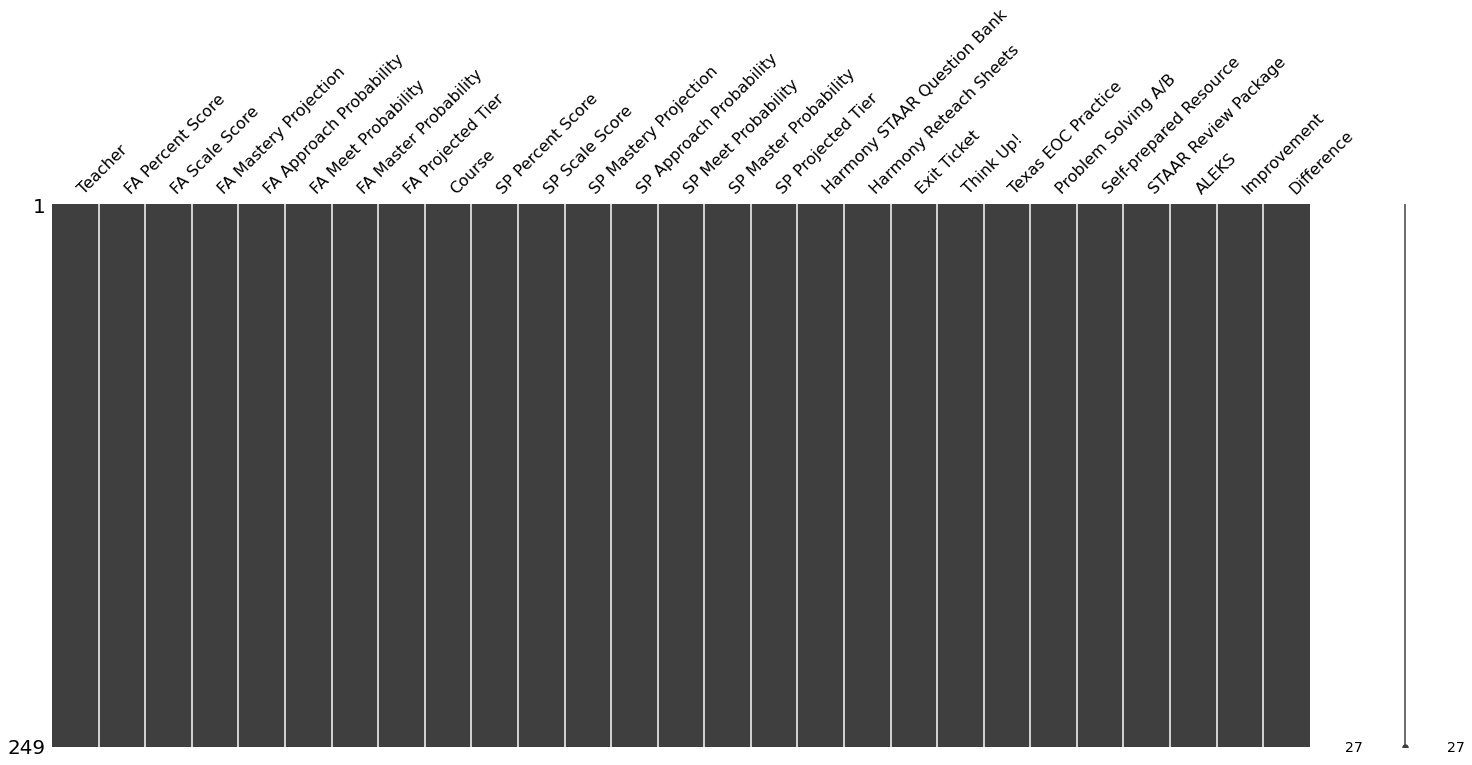

In [26]:
#checking missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)
ms.matrix(data)
plt.show()

In [27]:
#checking for duplications
duplicates = data.duplicated().sum()
print('Number of Duplicated Entries: ',duplicates)

Number of Duplicated Entries:  18


In [28]:
dup = data.duplicated()
dup_indices = [index for index, is_duplicate in enumerate(dup) if is_duplicate]

print("Indices of duplicated values:")
for index in dup_indices:
    print(index)

Indices of duplicated values:
61
71
78
116
145
159
174
176
178
179
181
184
209
213
217
230
239
242


In [29]:
print("Data rows corresponding to duplicated values:")
for index in dup_indices:
    print(data.iloc[index])

Data rows corresponding to duplicated values:
Teacher                        Leadon, Alcindor
FA Percent Score                         0.2059
FA Scale Score                             1452
FA Mastery Projection              Did Not Meet
FA Approach Probability                    0.01
FA Meet Probability                        0.01
FA Master Probability                      0.01
FA Projected Tier                  Tier 3 (RTI)
Course                                        1
SP Percent Score                         0.1765
SP Scale Score                             1429
SP Mastery Projection              Did Not Meet
SP Approach Probability                    0.01
SP Meet Probability                        0.01
SP Master Probability                      0.01
SP Projected Tier                  Tier 3 (RTI)
Harmony STAAR Question Bank                   1
Harmony Reteach Sheets                        0
Exit Ticket                                   0
Think Up!                                 

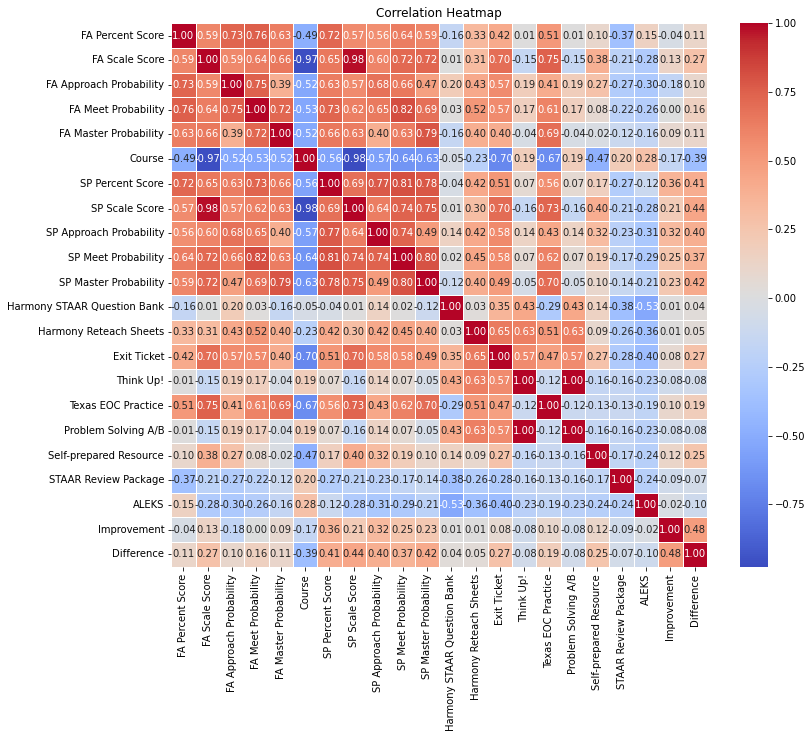

In [30]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: title={'center': 'FA Scale Score'}, xlabel='Teacher'>

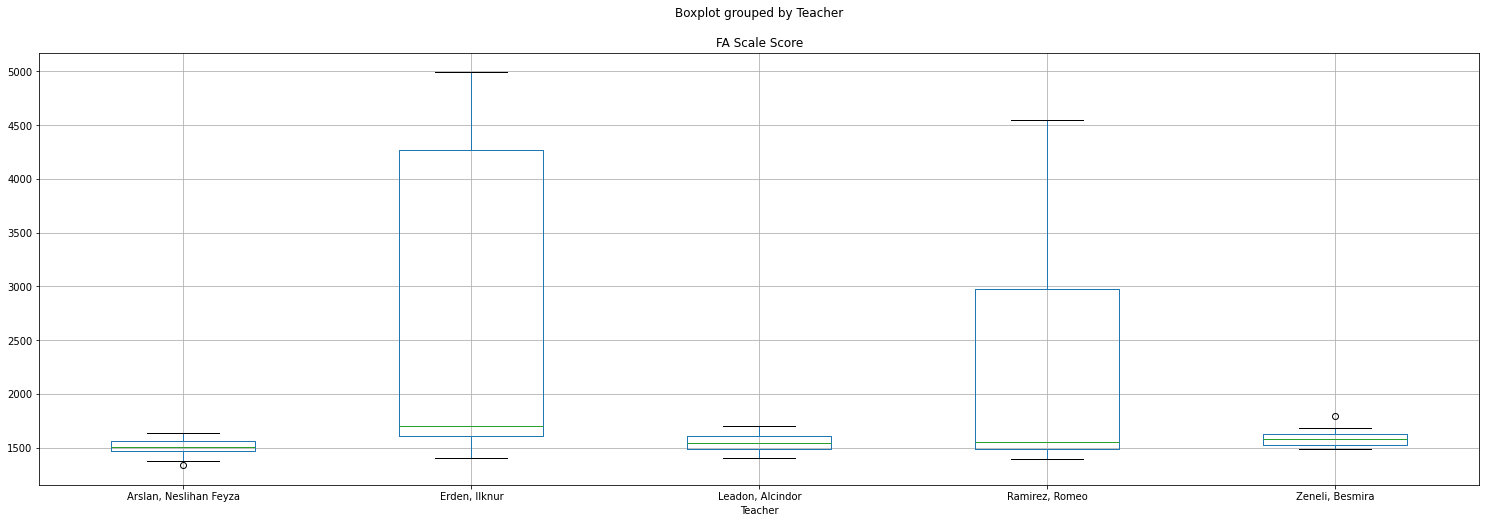

In [31]:
#boxplots of fall scale scores for each teacher
data.boxplot(column="FA Scale Score",by= "Teacher",        
                 figsize= (25,8))

<Axes: title={'center': 'SP Scale Score'}, xlabel='Teacher'>

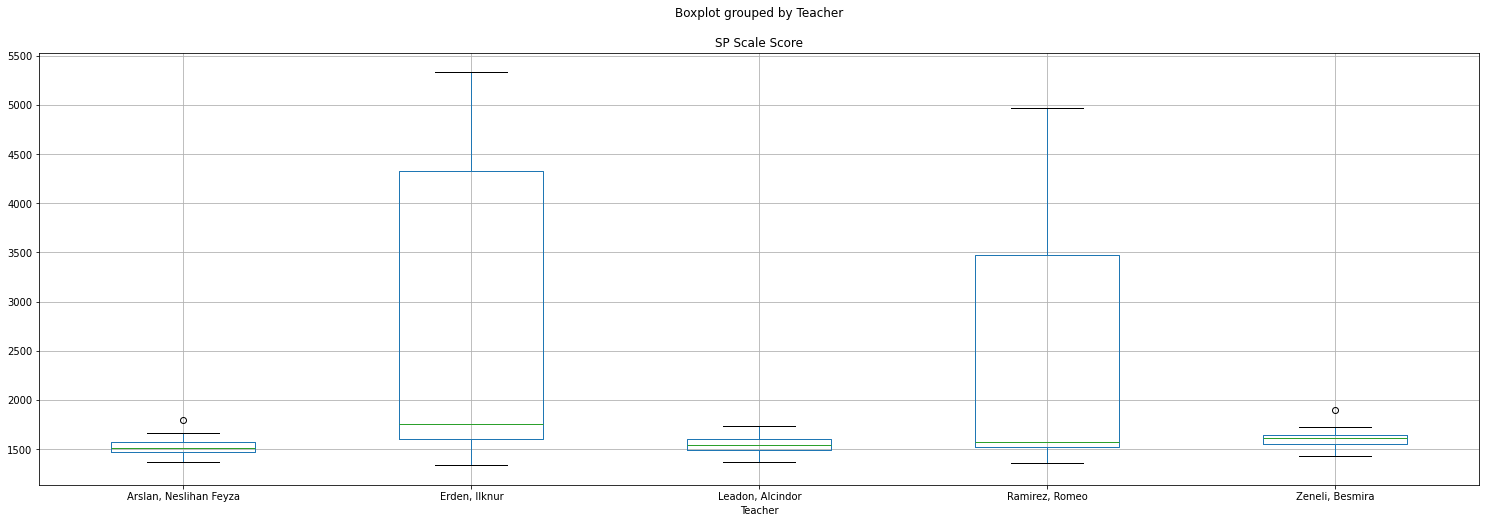

In [32]:
#boxplots of spring scale scores for each teacher
data.boxplot(column="SP Scale Score",by= "Teacher",        
                 figsize= (25,8))

<Axes: title={'center': 'Difference'}, xlabel='Teacher'>

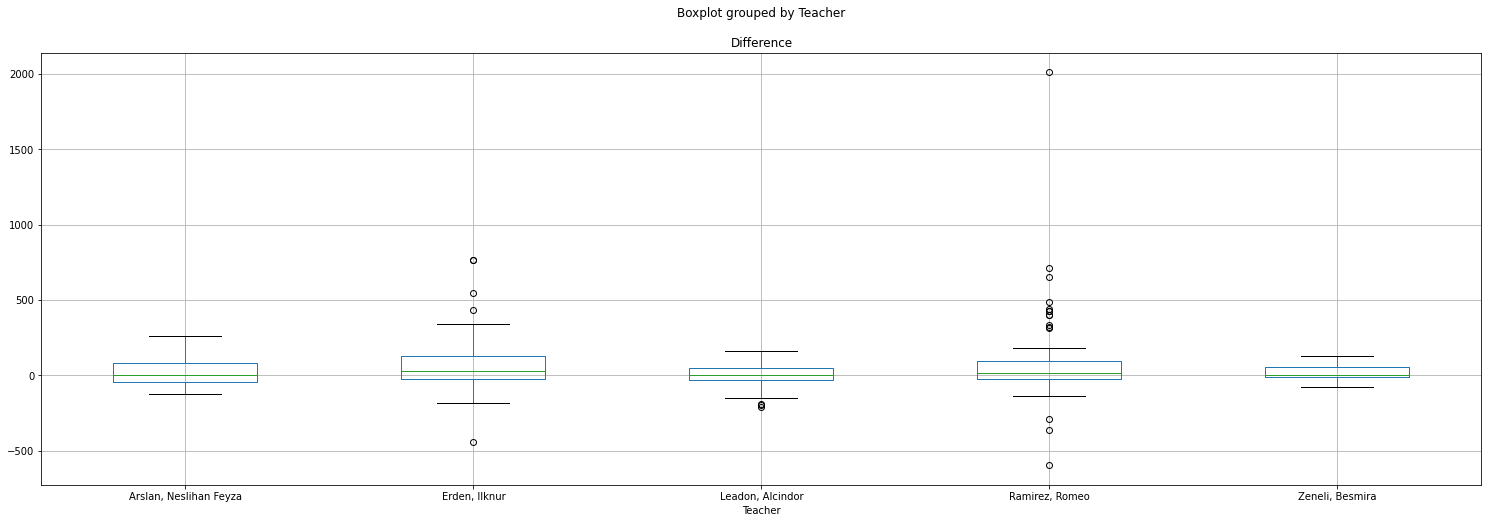

In [33]:
#boxplots of difference for each teacher
data.boxplot(column="Difference",by= "Teacher",        
                 figsize= (25,8))

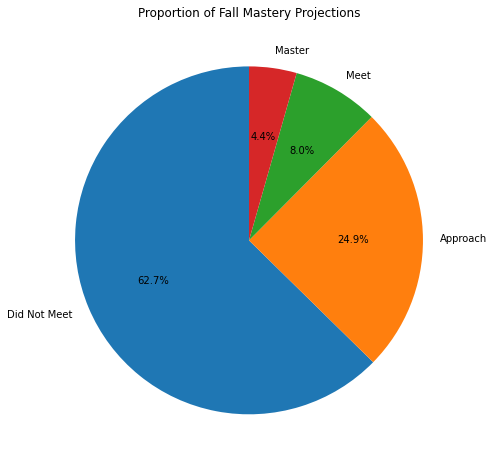

In [34]:
#overall mastery projection proportion of fall data
plt.figure(figsize=(8, 8))
proportions = data['FA Mastery Projection'].value_counts()
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Fall Mastery Projections')
plt.show()

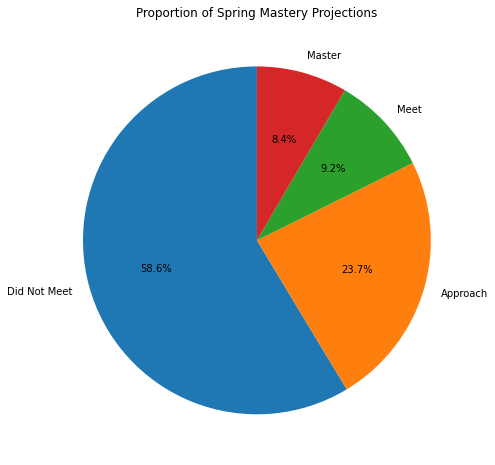

In [35]:
#overall mastery projection proportion of spring data
plt.figure(figsize=(8, 8))
proportions = data['SP Mastery Projection'].value_counts()
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Spring Mastery Projections')
plt.show()

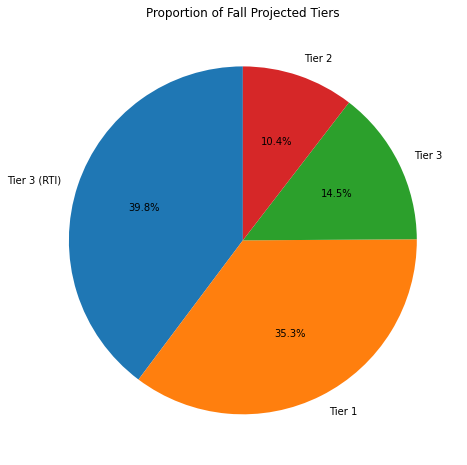

In [36]:
plt.figure(figsize=(8, 8))
proportions = data['FA Projected Tier'].value_counts()
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Fall Projected Tiers')
plt.show()

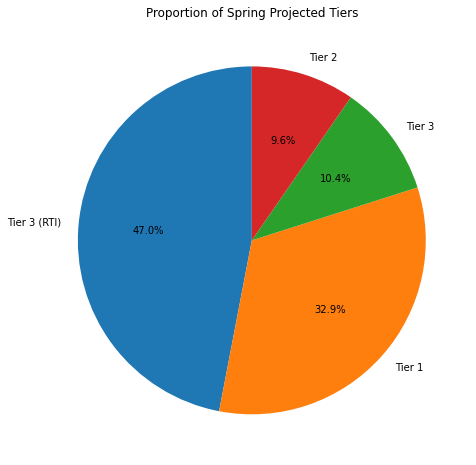

In [37]:
plt.figure(figsize=(8, 8))
proportions = data['SP Projected Tier'].value_counts()
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Spring Projected Tiers')
plt.show()

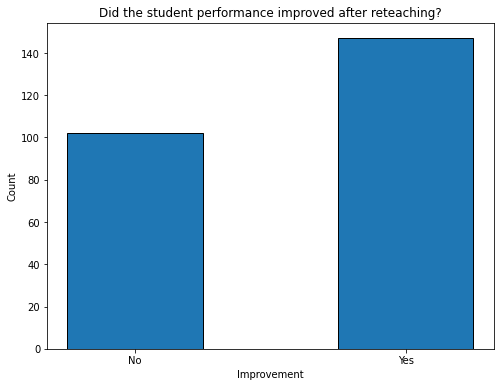

In [38]:
#overall improvement data
data_labels = ['No', 'Yes']

plt.figure(figsize=(8, 6))
plt.hist(data['Improvement'], bins=2, edgecolor='black', align='mid', rwidth=0.5)

plt.xlabel('Improvement')
plt.ylabel('Count')
plt.title('Did the student performance improved after reteaching?')
plt.xticks([0.25, 0.75], data_labels) 
    
plt.show()

In [39]:
data['Improvement'].value_counts()

Improvement
1    147
0    102
Name: count, dtype: int64

In [40]:
data['Difference'].value_counts()

Difference
-8      6
 20     6
-9      5
-34     5
 19     4
       ..
-140    1
-148    1
 86     1
 159    1
 180    1
Name: count, Length: 165, dtype: int64

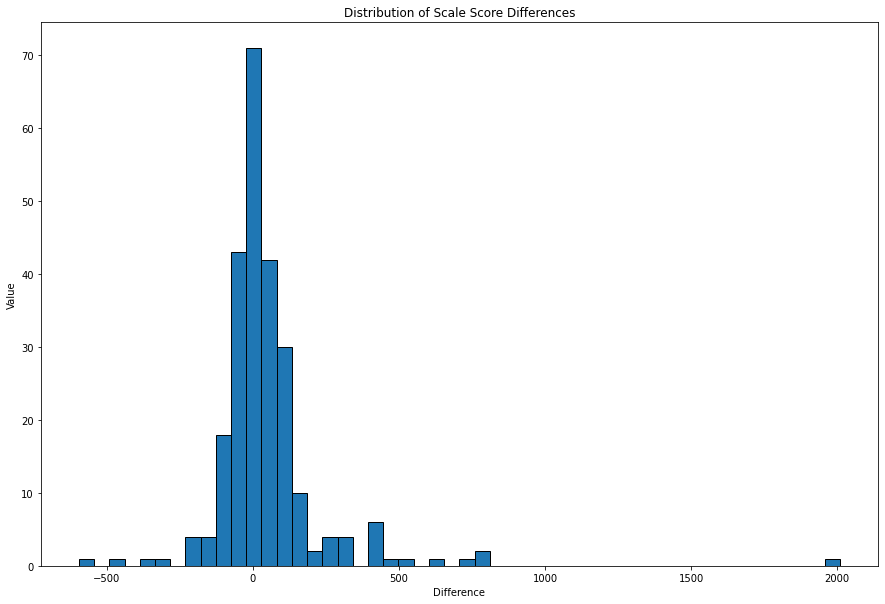

In [41]:
plt.figure(figsize=(15, 10))
plt.hist(data['Difference'], bins=50, edgecolor='black')

plt.xlabel('Difference')
plt.ylabel('Value')
plt.title('Distribution of Scale Score Differences')

plt.show()

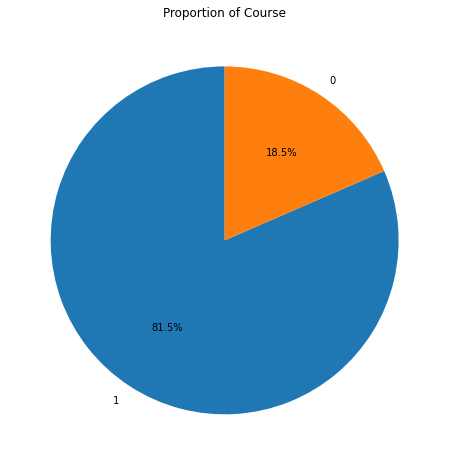

In [42]:
#overall course
plt.figure(figsize=(8, 8))
proportions = data['Course'].value_counts()
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Course')
plt.show()

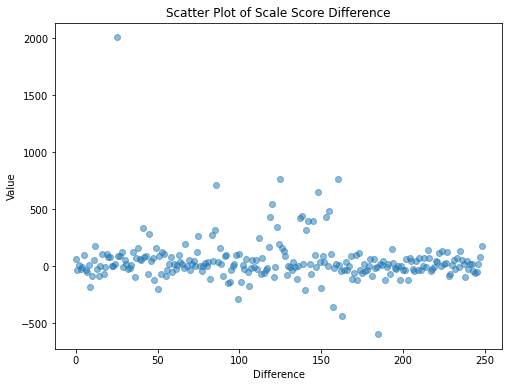

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data['Difference'])), data['Difference'], alpha=0.5)

plt.xlabel('Difference')
plt.ylabel('Value')
unique_teachers = data['Teacher'].unique()
plt.title('Scatter Plot of Scale Score Difference')

plt.show()

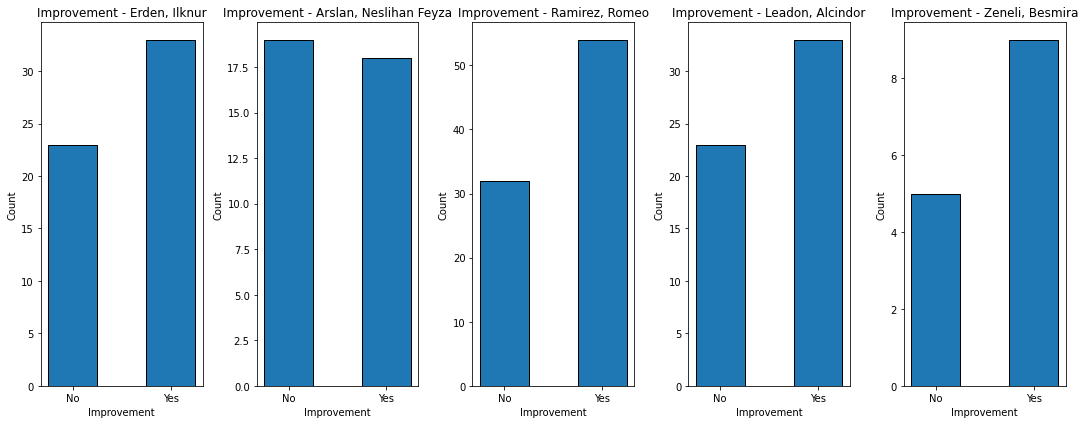

In [44]:
unique_teachers = data['Teacher'].unique()

fig, axs = plt.subplots(nrows=1, ncols=len(unique_teachers), figsize=(15, 6))

for i, teacher in enumerate(unique_teachers):
    teacher_data = data[data['Teacher'] == teacher]
    
    axs[i].hist(teacher_data['Improvement'], bins=2, edgecolor='black', align='mid', rwidth=0.5)
    axs[i].set_xlabel('Improvement')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Improvement - {teacher}')
    axs[i].set_xticks([0.25, 0.75])
    axs[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

In [45]:
data['Teacher'].value_counts()

Teacher
Ramirez, Romeo            86
Erden, Ilknur             56
Leadon, Alcindor          56
Arslan, Neslihan Feyza    37
Zeneli, Besmira           14
Name: count, dtype: int64

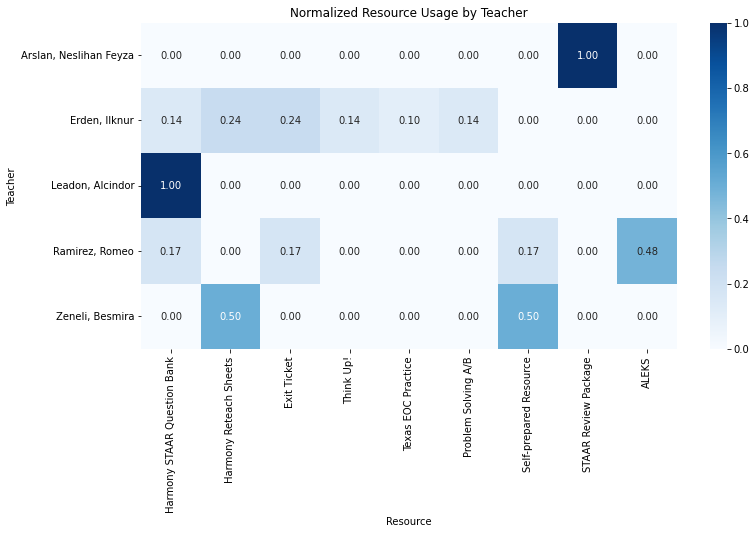

In [46]:
# Group data by Teacher and sum resource columns
teacher_resources = data.groupby('Teacher').sum()[['Harmony STAAR Question Bank', 'Harmony Reteach Sheets', 'Exit Ticket', 'Think Up!', 'Texas EOC Practice', 'Problem Solving A/B', 'Self-prepared Resource', 'STAAR Review Package', 'ALEKS']]

# Normalize the resource usage to have values between 0 and 1
teacher_resources_normalized = teacher_resources.div(teacher_resources.sum(axis=1), axis=0)

# Plot heatmap of resource usage
plt.figure(figsize=(12, 6))
sns.heatmap(teacher_resources_normalized, cmap='Blues', annot=True, fmt=".2f", cbar=True)
plt.title('Normalized Resource Usage by Teacher')
plt.xlabel('Resource')
plt.ylabel('Teacher')
plt.show()

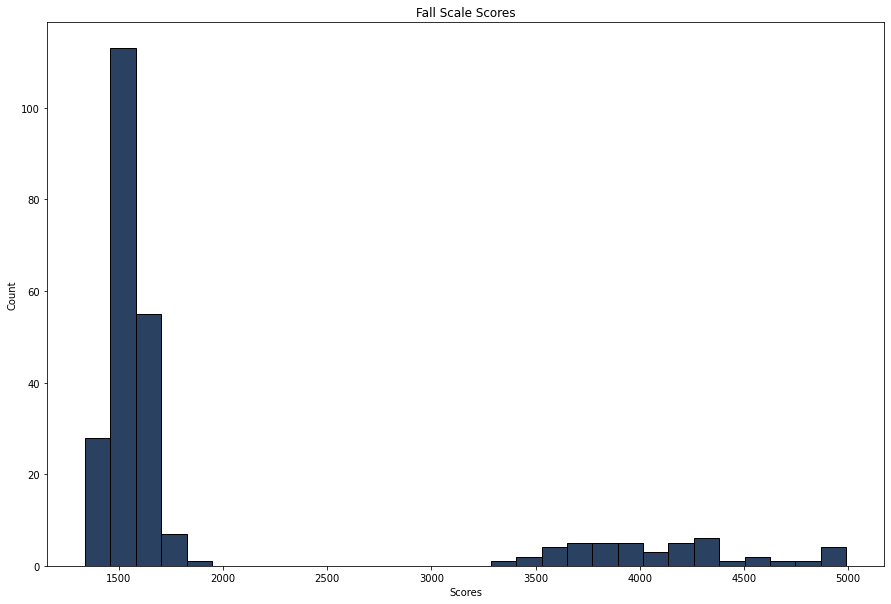

In [47]:
#scale score histogram for fall
plt.figure(figsize=(15, 10))
plt.hist(([data['FA Scale Score']]), bins=30, color=['#2B4162'], edgecolor='black')
 
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Fall Scale Scores')
plt.show()

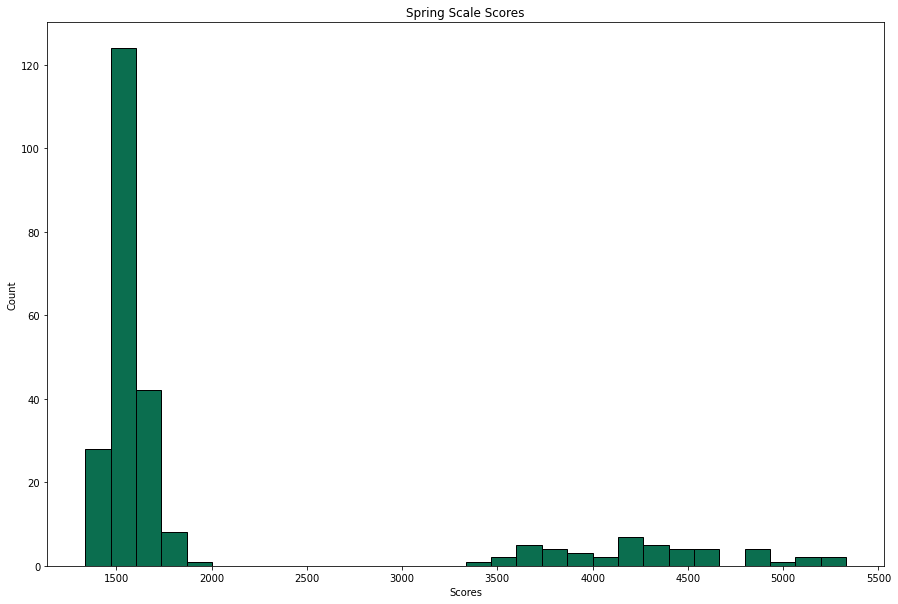

In [48]:
#scale score histogram for spring
plt.figure(figsize=(15, 10))
plt.hist(([data['SP Scale Score']]), bins=30, color=['#0B6E4F'], edgecolor='black')
 
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Spring Scale Scores')
plt.show()

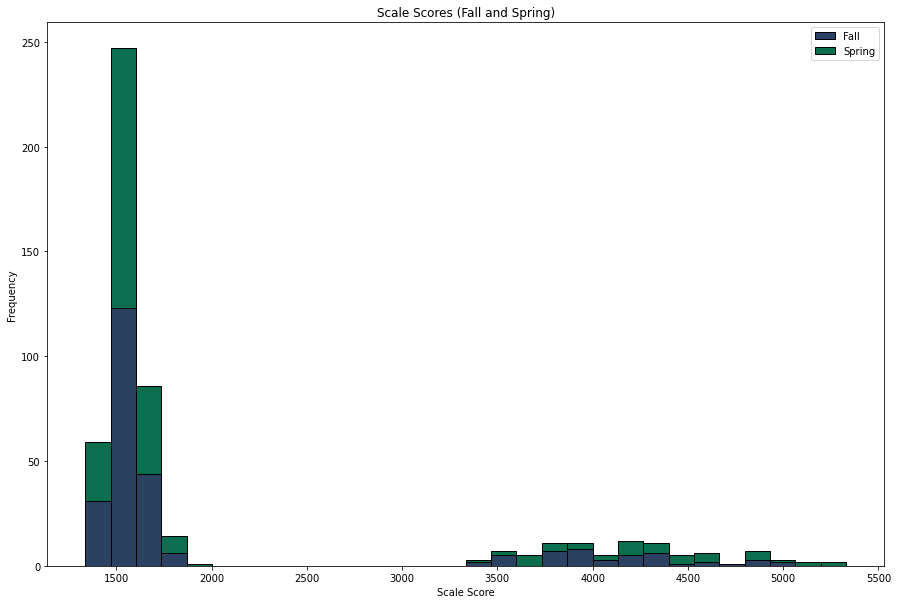

In [49]:
#scale score histogram for fall and spring
plt.figure(figsize=(15, 10))
plt.hist(([data['FA Scale Score'], data['SP Scale Score']]), bins=30, stacked=True, color=['#2B4162', '#0B6E4F'], edgecolor='black')
 
plt.xlabel('Scale Score')
plt.ylabel('Frequency')
plt.title('Scale Scores (Fall and Spring)')
 
plt.legend(['Fall', 'Spring'])

plt.show()

In [50]:
data

,Teacher,FA Percent Score,FA Scale Score,FA Mastery Projection,FA Approach Probability,FA Meet Probability,FA Master Probability,FA Projected Tier,Course,SP Percent Score,...,Harmony Reteach Sheets,Exit Ticket,Think Up!,Texas EOC Practice,Problem Solving A/B,Self-prepared Resource,STAAR Review Package,ALEKS,Improvement,Difference
0,"Erden, Ilknur",0.1765,1429,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI),1,0.2647,...,1,1,1,0,1,0,0,0,1,63
1,"Arslan, Neslihan Feyza",0.2647,1560,Did Not Meet,0.39,0.02,0.01,Tier 3,1,0.3235,...,0,0,0,0,0,0,1,0,0,-32
2,"Ramirez, Romeo",0.4444,3876,Approach,0.98,0.21,0.01,Tier 1,0,0.4444,...,0,1,0,0,0,1,0,0,1,12
3,"Leadon, Alcindor",0.2059,1452,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI),1,0.1765,...,0,0,0,0,0,0,0,0,0,-23
4,"Erden, Ilknur",0.5294,1698,Approach,0.99,0.73,0.01,Tier 1,1,0.5000,...,1,1,1,0,1,0,0,0,0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,"Ramirez, Romeo",0.4062,1506,Did Not Meet,0.09,0.01,0.01,Tier 3 (RTI),1,0.2105,...,0,0,0,0,0,0,0,1,0,-56
245,"Ramirez, Romeo",0.2188,1412,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI),1,0.1053,...,0,0,0,0,0,0,0,1,0,-51
246,"Ramirez, Romeo",0.5938,1582,Did Not Meet,0.60,0.05,0.01,Tier 2,1,0.5000,...,0,0,0,0,0,0,0,1,1,16
247,"Ramirez, Romeo",0.2500,1431,Did Not Meet,0.01,0.01,0.01,Tier 3 (RTI),1,0.2368,...,0,0,0,0,0,0,0,1,1,83


In [51]:
import scipy.stats as stats

# Levene's test
levene_statistic, p_value_levene = stats.levene(data['FA Scale Score'][data['Course'] == 0],
                                                data['FA Scale Score'][data['Course'] == 1])

# Shapiro-Wilk test
shapiro_math8 = stats.shapiro(data['FA Scale Score'][data['Course'] == 0])
shapiro_algebra1 = stats.shapiro(data['FA Scale Score'][data['Course'] == 1])

#Perform ANOVA
# Assuming data meets assumptions
anova_result = stats.f_oneway(data['FA Scale Score'][data['Course'] == 0],
                               data['FA Scale Score'][data['Course'] == 1])

In [52]:
#perform post-hoc analysis (Tukey's HSD test)
if anova_result.pvalue < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    tukey_data = data[['FA Scale Score', 'Course']]
    tukey_result = pairwise_tukeyhsd(tukey_data['FA Scale Score'], tukey_data['Course'])
    print(tukey_result)


print("ANOVA F-value:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1 -2502.6848   0.0 -2582.3714 -2422.9983   True
-----------------------------------------------------------
ANOVA F-value: 3826.5269095179806
ANOVA p-value: 2.428445311522122e-152


meandiff: This column shows the mean difference between the groups (group2 - group1). In your output, it's -2502.6848, indicating that the mean of group2 (likely Algebra I) is approximately 2502.6848 units lower than the mean of group1 (likely Math-8).

p-adj: This column represents the p-value adjusted for multiple comparisons. It tells you whether the observed mean difference is statistically significant. In this case, it's 0.0, indicating that the mean difference is statistically significant.

reject: This column indicates whether the null hypothesis of no difference between the groups can be rejected based on the adjusted p-value. If it's "True," it means the null hypothesis is rejected, suggesting that there is a significant difference between the groups.

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Difference ~ C(Teacher) + C(Course) + C(Teacher):C(Course)', data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq     df          F        PR(>F)
C(Teacher)            1.827545e+06    4.0  13.165178  5.430736e-08
C(Course)             8.921356e+05    1.0  25.706882  7.904064e-07
C(Teacher):C(Course)  5.700087e+05    4.0   4.106200  3.077971e-03
Residual              8.398405e+06  242.0        NaN           NaN


/home/erdenzehra/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


"Teacher" factor has a significant effect on the "Difference" variable, as indicated by the very low p-value (close to 0).
 
"Course" factor also has a significant effect on the "Difference" variable, again indicated by the very low p-value.
  
Interaction between "Teacher" and "Course" is also significant, as indicated by the low p-value.

In [55]:
data = data.drop('Teacher', axis = 1)
data = data.drop('FA Percent Score', axis = 1)
data = data.drop('FA Projected Tier', axis = 1)
data = data.drop('SP Percent Score', axis = 1)
data = data.drop('SP Scale Score', axis = 1)
data = data.drop('SP Mastery Projection', axis = 1)
data = data.drop('SP Approach Probability', axis = 1)
data = data.drop('SP Meet Probability', axis = 1)
data = data.drop('SP Master Probability', axis = 1)
data = data.drop('SP Projected Tier', axis = 1)

In [56]:
data['Scaled_Score_Category'] = pd.cut(data['FA Scale Score'], bins=3, labels=['Low', 'Medium', 'High'])

In [57]:
data

,FA Scale Score,FA Mastery Projection,FA Approach Probability,FA Meet Probability,FA Master Probability,Course,Harmony STAAR Question Bank,Harmony Reteach Sheets,Exit Ticket,Think Up!,Texas EOC Practice,Problem Solving A/B,Self-prepared Resource,STAAR Review Package,ALEKS,Improvement,Difference,Scaled_Score_Category
0,1429,Did Not Meet,0.01,0.01,0.01,1,1,1,1,1,0,1,0,0,0,1,63,Low
1,1560,Did Not Meet,0.39,0.02,0.01,1,0,0,0,0,0,0,0,1,0,0,-32,Low
2,3876,Approach,0.98,0.21,0.01,0,1,0,1,0,0,0,1,0,0,1,12,High
3,1452,Did Not Meet,0.01,0.01,0.01,1,1,0,0,0,0,0,0,0,0,0,-23,Low
4,1698,Approach,0.99,0.73,0.01,1,1,1,1,1,0,1,0,0,0,0,-8,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1506,Did Not Meet,0.09,0.01,0.01,1,0,0,0,0,0,0,0,0,1,0,-56,Low
245,1412,Did Not Meet,0.01,0.01,0.01,1,0,0,0,0,0,0,0,0,1,0,-51,Low
246,1582,Did Not Meet,0.60,0.05,0.01,1,0,0,0,0,0,0,0,0,1,1,16,Low
247,1431,Did Not Meet,0.01,0.01,0.01,1,0,0,0,0,0,0,0,0,1,1,83,Low


In [58]:
data.columns

Index(['FA Scale Score', 'FA Mastery Projection', 'FA Approach Probability',
       'FA Meet Probability', 'FA Master Probability', 'Course',
       'Harmony STAAR Question Bank', 'Harmony Reteach Sheets', 'Exit Ticket',
       'Think Up!', 'Texas EOC Practice', 'Problem Solving A/B',
       'Self-prepared Resource', 'STAAR Review Package', 'ALEKS',
       'Improvement', 'Difference', 'Scaled_Score_Category'],
      dtype='object')

# Data Transformation

In [59]:
mastery_order = ['Did Not Meet', 'Approach', 'Meet', 'Master']

def custom_encode(categories, order):
    encoding = {category: index for index, category in enumerate(order)}
    return [encoding[category] for category in categories]

data['FA Mastery Projection'] = custom_encode(data['FA Mastery Projection'], mastery_order)

label_mapping = dict(zip(mastery_order, range(len(mastery_order))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Did Not Meet': 0, 'Approach': 1, 'Meet': 2, 'Master': 3}


In [60]:
score_order = ['Low', 'Medium', 'High']

data['Scaled_Score_Category'] = custom_encode(data['Scaled_Score_Category'], score_order)

label_mapping = dict(zip(score_order, range(len(score_order))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Low': 0, 'Medium': 1, 'High': 2}


In [61]:
#min-max scaling scale scores (fall and spring) and difference
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['FA Scale Score'] = scaler.fit_transform(data[['FA Scale Score']])


data['Difference'] = scaler.fit_transform(data[['Difference']])

In [62]:
data

,FA Scale Score,FA Mastery Projection,FA Approach Probability,FA Meet Probability,FA Master Probability,Course,Harmony STAAR Question Bank,Harmony Reteach Sheets,Exit Ticket,Think Up!,Texas EOC Practice,Problem Solving A/B,Self-prepared Resource,STAAR Review Package,ALEKS,Improvement,Difference,Scaled_Score_Category
0,0.024918,0,0.01,0.01,0.01,1,1,1,1,1,0,1,0,0,0,1,0.252975,0
1,0.060789,0,0.39,0.02,0.01,1,0,0,0,0,0,0,0,1,0,0,0.216507,0
2,0.694962,1,0.98,0.21,0.01,0,1,0,1,0,0,0,1,0,0,1,0.233397,2
3,0.031216,0,0.01,0.01,0.01,1,1,0,0,0,0,0,0,0,0,0,0.219962,0
4,0.098576,1,0.99,0.73,0.01,1,1,1,1,1,0,1,0,0,0,0,0.225720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.046002,0,0.09,0.01,0.01,1,0,0,0,0,0,0,0,0,1,0,0.207294,0
245,0.020263,0,0.01,0.01,0.01,1,0,0,0,0,0,0,0,0,1,0,0.209213,0
246,0.066813,0,0.60,0.05,0.01,1,0,0,0,0,0,0,0,0,1,1,0.234933,0
247,0.025465,0,0.01,0.01,0.01,1,0,0,0,0,0,0,0,0,1,1,0.260653,0


# Modeling

In [63]:
#random forest is used to perform feature importance analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [64]:
# splitting the data into features (X) and target (y)
X = data[['FA Scale Score', 'FA Mastery Projection', 'FA Approach Probability',
          'FA Meet Probability', 'FA Master Probability', 'Course',
          'Harmony STAAR Question Bank', 'Harmony Reteach Sheets', 'Exit Ticket',
          'Think Up!', 'Texas EOC Practice', 'Problem Solving A/B',
          'Self-prepared Resource', 'STAAR Review Package', 'ALEKS', 'Scaled_Score_Category']]
y = data['Improvement']

# spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
#fitting the model and predicting
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

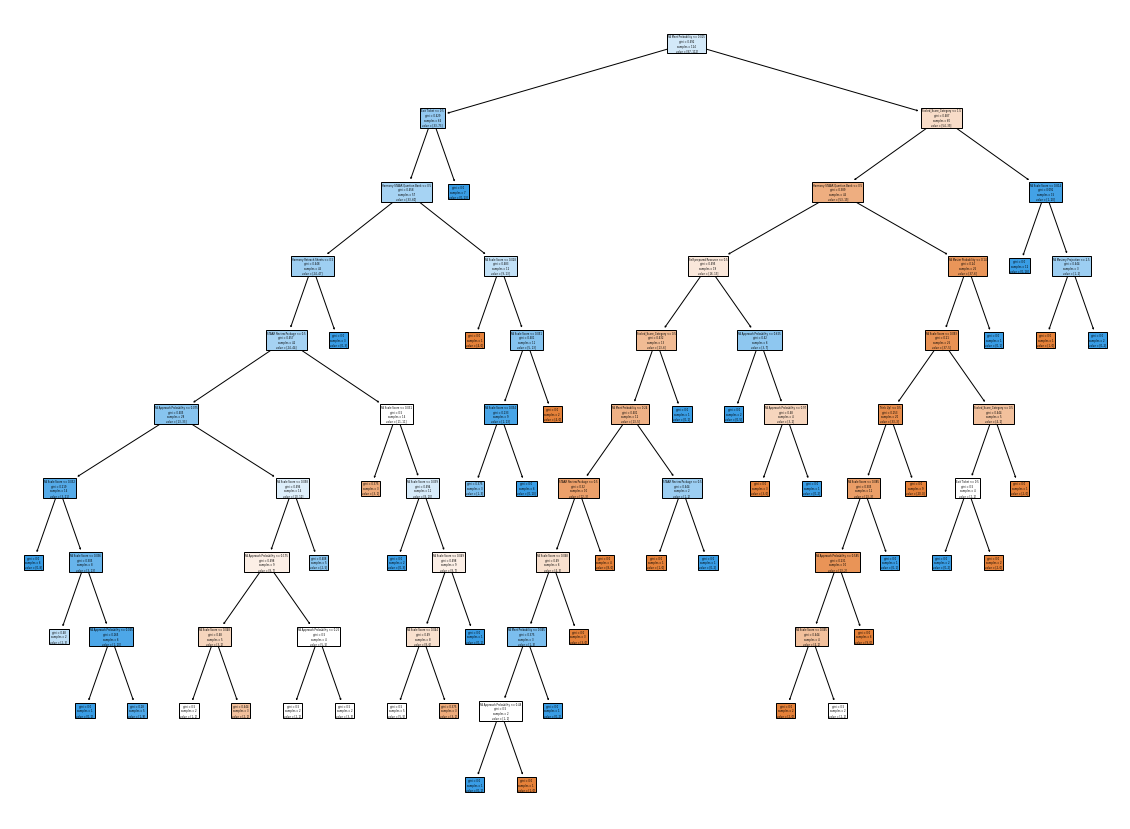

In [66]:
#printing the first tree of the  model
from sklearn import tree

plt.figure(figsize=(20, 15))
tree.plot_tree(rf.estimators_[0], filled=True, feature_names=X.columns)
plt.show()

In [67]:
#model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)



Mean Absolute Error: 0.36
Mean Squared Error: 0.36
Root Mean Squared Error: 0.6
R-squared: -0.6042780748663099


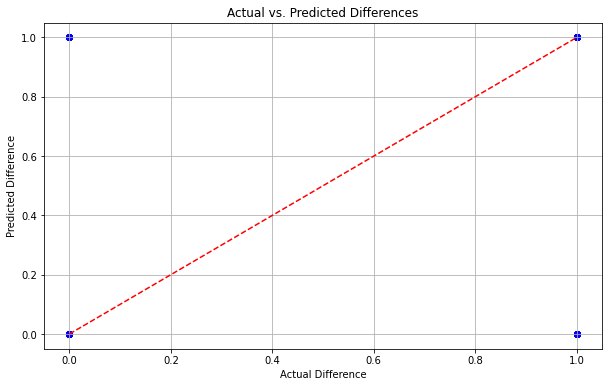

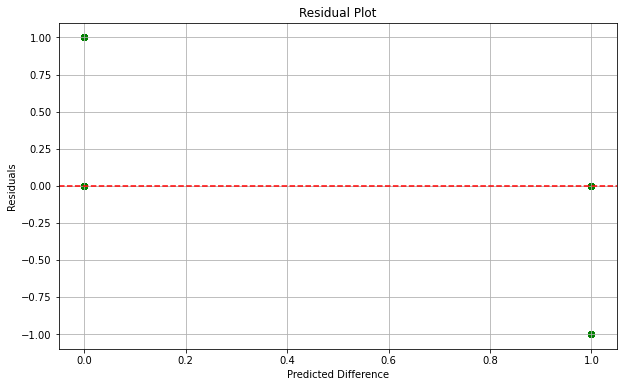

In [68]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Difference')
plt.ylabel('Predicted Difference')
plt.title('Actual vs. Predicted Differences')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted Difference')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

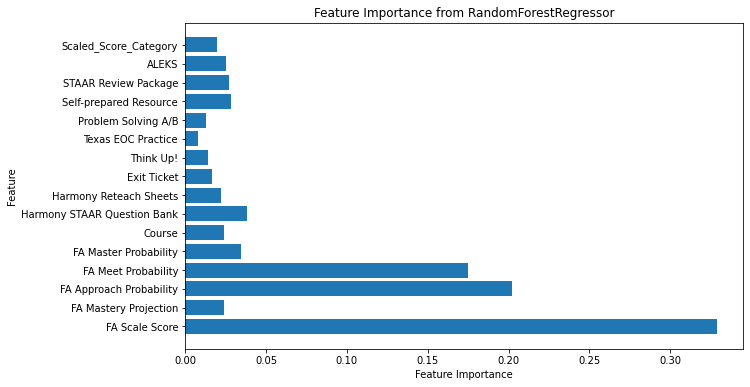

In [69]:
# visualize feature importances
feature_importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()

In [74]:
#logistic regression is used for the classification task to so which resources affect the 'Effective' column most
#splitting the data into features (X) and target (y)
X = data[['FA Scale Score', 'FA Mastery Projection', 'FA Approach Probability',
          'FA Meet Probability', 'FA Master Probability', 'Course',
          'Harmony STAAR Question Bank', 'Harmony Reteach Sheets', 'Exit Ticket',
          'Think Up!', 'Texas EOC Practice', 'Problem Solving A/B',
          'Self-prepared Resource', 'STAAR Review Package', 'ALEKS', 'Scaled_Score_Category']]
y = data['Improvement']

# spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
#fitting and predicting
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred_lg = lg.predict(X_test)

In [76]:
#model evaluation
accuracy = accuracy_score(y_test, y_pred_lg)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_lg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lg))

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.42      0.48        19
           1       0.69      0.81      0.75        31

    accuracy                           0.66        50
   macro avg       0.63      0.61      0.62        50
weighted avg       0.65      0.66      0.65        50

Confusion Matrix:
[[ 8 11]
 [ 6 25]]


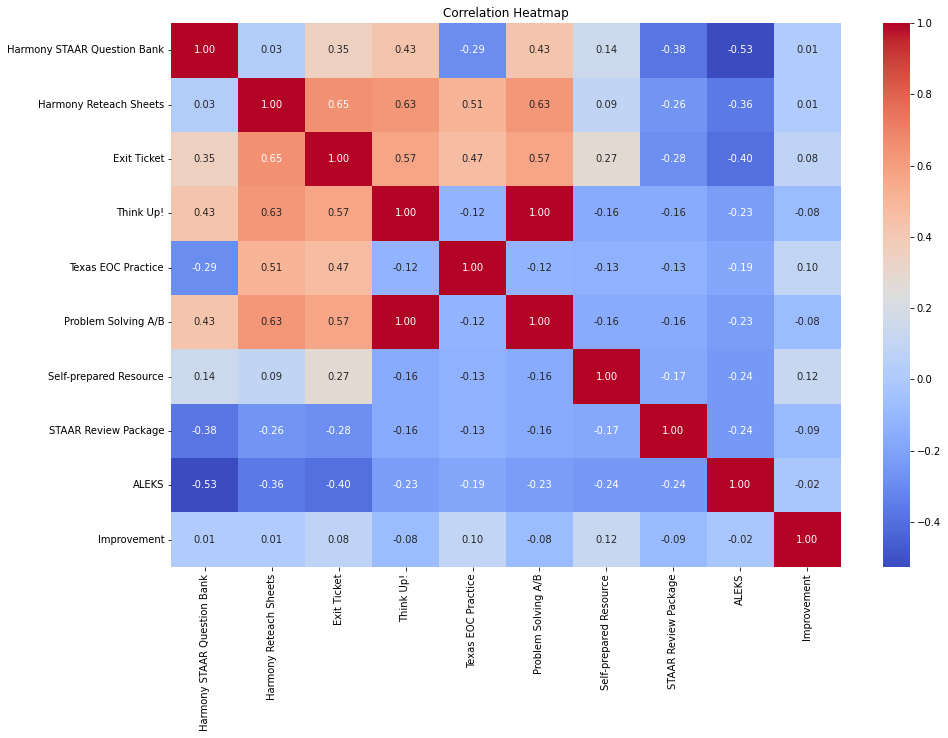

In [77]:
predictors = ['Harmony STAAR Question Bank', 'Harmony Reteach Sheets', 'Exit Ticket',
              'Think Up!', 'Texas EOC Practice', 'Problem Solving A/B',
              'Self-prepared Resource', 'STAAR Review Package', 'ALEKS']
target = 'Improvement'

data_subset = data[predictors + [target]]
plt.figure(figsize=(15, 10))
correlation_matrix = data_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [78]:
#ols regression model for statistical analysis
import statsmodels.api as sm

X = data[predictors]
y = data['Improvement']

lm_model = sm.OLS(y, X)
lm_results = lm_model.fit()

print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:            Improvement   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.520
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.172
Time:                        21:51:20   Log-Likelihood:                -171.98
No. Observations:                 249   AIC:                             358.0
Df Residuals:                     242   BIC:                             382.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Harmony STAAR Ques

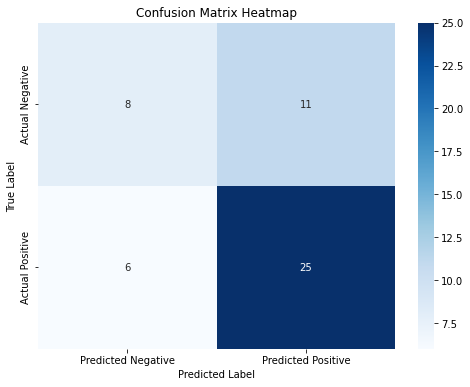

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred_lg)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [80]:
#fitting the model and predicting
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

y_scores_xgb = xgb.predict_proba(X_test)[:, 1]

Accuracy: 0.7
Precision: 0.7666666666666667
Recall: 0.7419354838709677
F1 Score: 0.7540983606557377
AUC-ROC: 0.7843803056027165
MAE: 0.3000
MSE: 0.3000
Log Loss: 0.5740


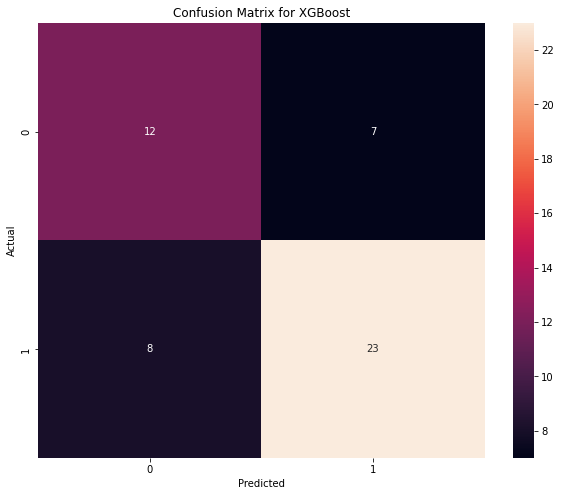

In [81]:
#model evaluation
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_roc_xgb = roc_auc_score(y_test, y_scores_xgb)

accuracy1 = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy1)
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"AUC-ROC: {auc_roc_xgb}")
mae = mean_absolute_error(y_test, y_pred_xgb)

print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, y_pred_xgb)

print(f"MSE: {mse:.4f}")
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_scores_xgb)

print(f"Log Loss: {logloss:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

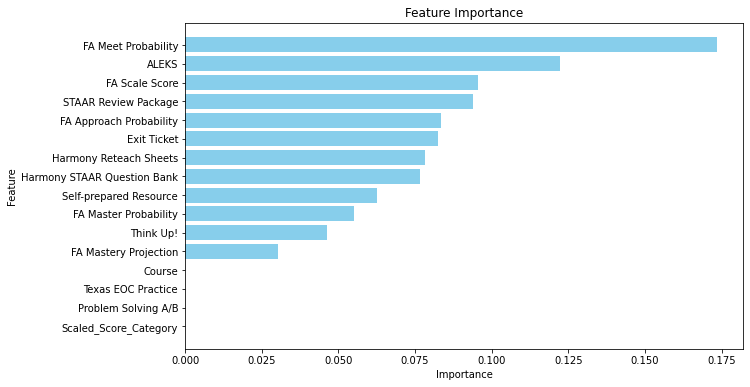

In [82]:
feature_importance = xgb.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()